# **Electric Vehicle Analysis**
Analysing different features of an electric vehicle data using ML.

Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Setting up a plotting style

In [4]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)


Data loading

In [5]:

print("\n1. LOADING DATA...")
print("-" * 30)

# File path - it's actually a CSV file with .xls extension
filename = "/content/ElectricCarData_Clean_Me.xls"
print(f"File path: {filename}")
print("Note: File is actually in CSV format despite .xls extension")

# Read the file as CSV
df = pd.read_csv(filename)

print("✅ Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Display first few rows to verify
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Show basic info about the dataset
print("\nDataset columns:")
print(df.columns.tolist())
print(f"\nNumber of vehicles: {len(df)}")


1. LOADING DATA...
------------------------------
File path: /content/ElectricCarData_Clean_Me.xls
Note: File is actually in CSV format despite .xls extension
✅ Data loaded successfully!
Dataset shape: (102, 15)

First 5 rows of the dataset:


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997



Dataset columns:
['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']

Number of vehicles: 102


Describing the data

In [6]:
print("\nDataset Info:")
df.info()

# 3. DESCRIBE THE DATA
print("\n3. DESCRIPTIVE STATISTICS")
print("-" * 30)
display(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 12.1+ KB

3. DESCRIPTIVE ST

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000


Checking for missing values

In [7]:
print("\n4. MISSING VALUES CHECK")
print("-" * 30)
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

if 'FullName' not in df.columns:
    df['FullName'] = df['Brand'] + ' ' + df['Model']



4. MISSING VALUES CHECK
------------------------------
Missing values in each column:
Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64


### **Data Visualization**

Powertrain Count Plot:


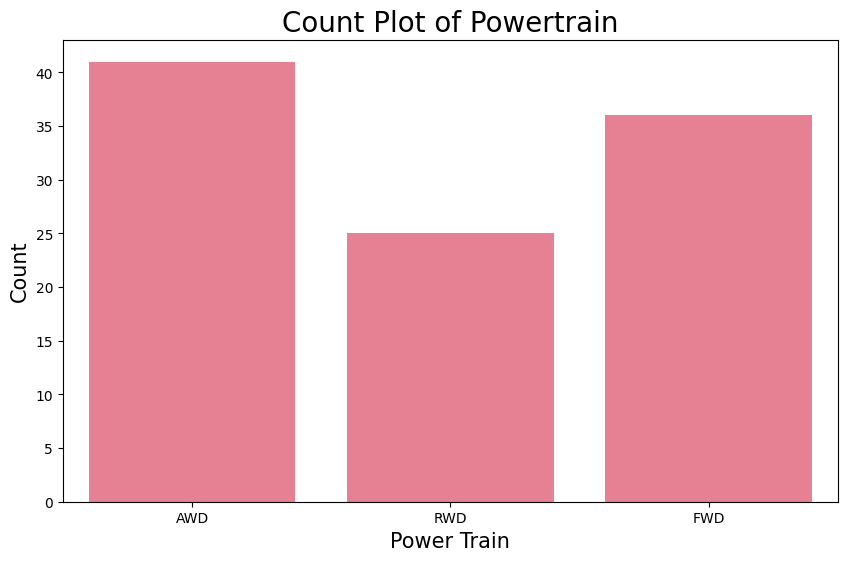

In [8]:

def power_train(dataframe):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize=20)
    plt.xlabel('Power Train', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()
print("Powertrain Count Plot:")
power_train(df)



Body Style Count Plot:


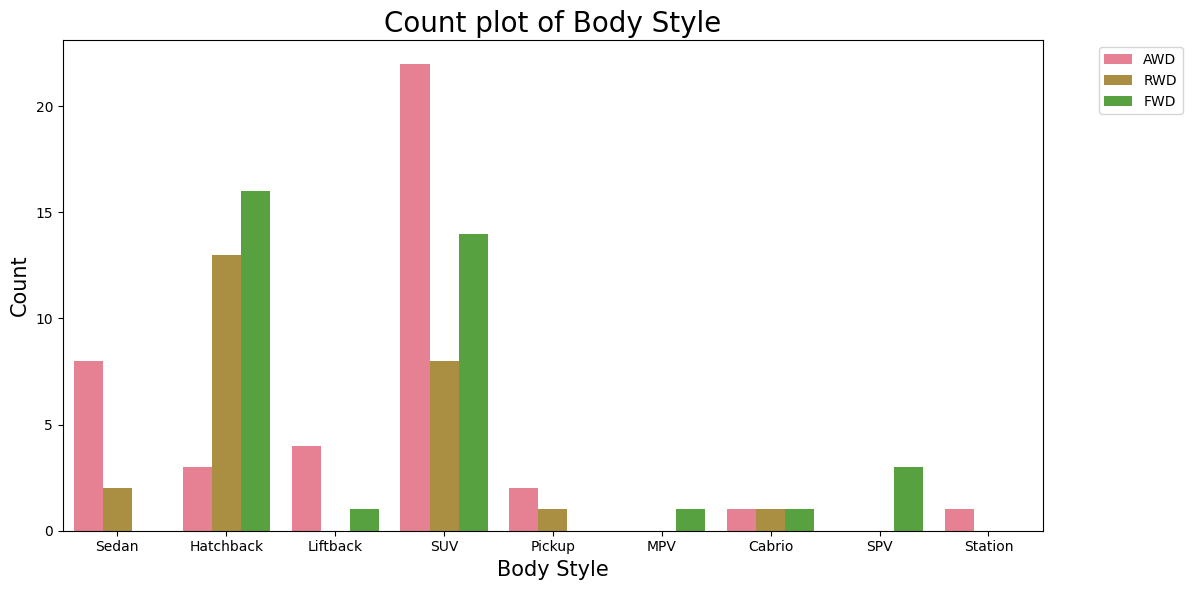

In [9]:
def bodystyle(dataframe):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='BodyStyle', data=dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize=20)
    plt.xlabel('Body Style', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
print("Body Style Count Plot:")
bodystyle(df)

Range of Vehicles:


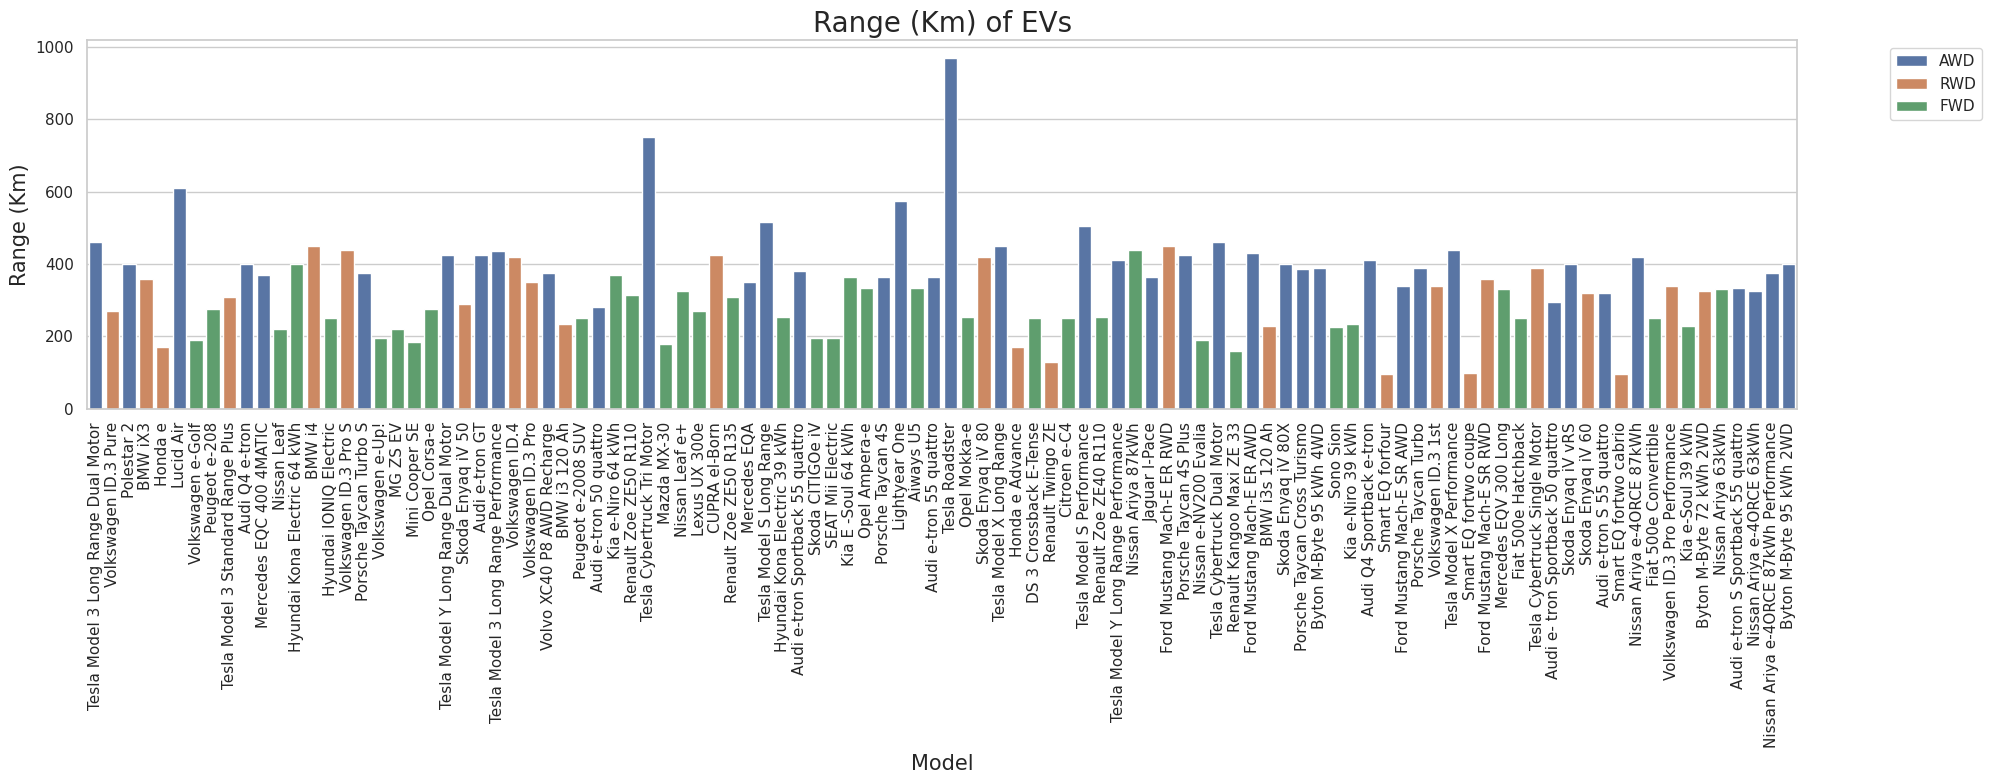

Range vs Battery Pack:


/tmp/ipython-input-911778064.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dataframe['FullName'], rotation=90)


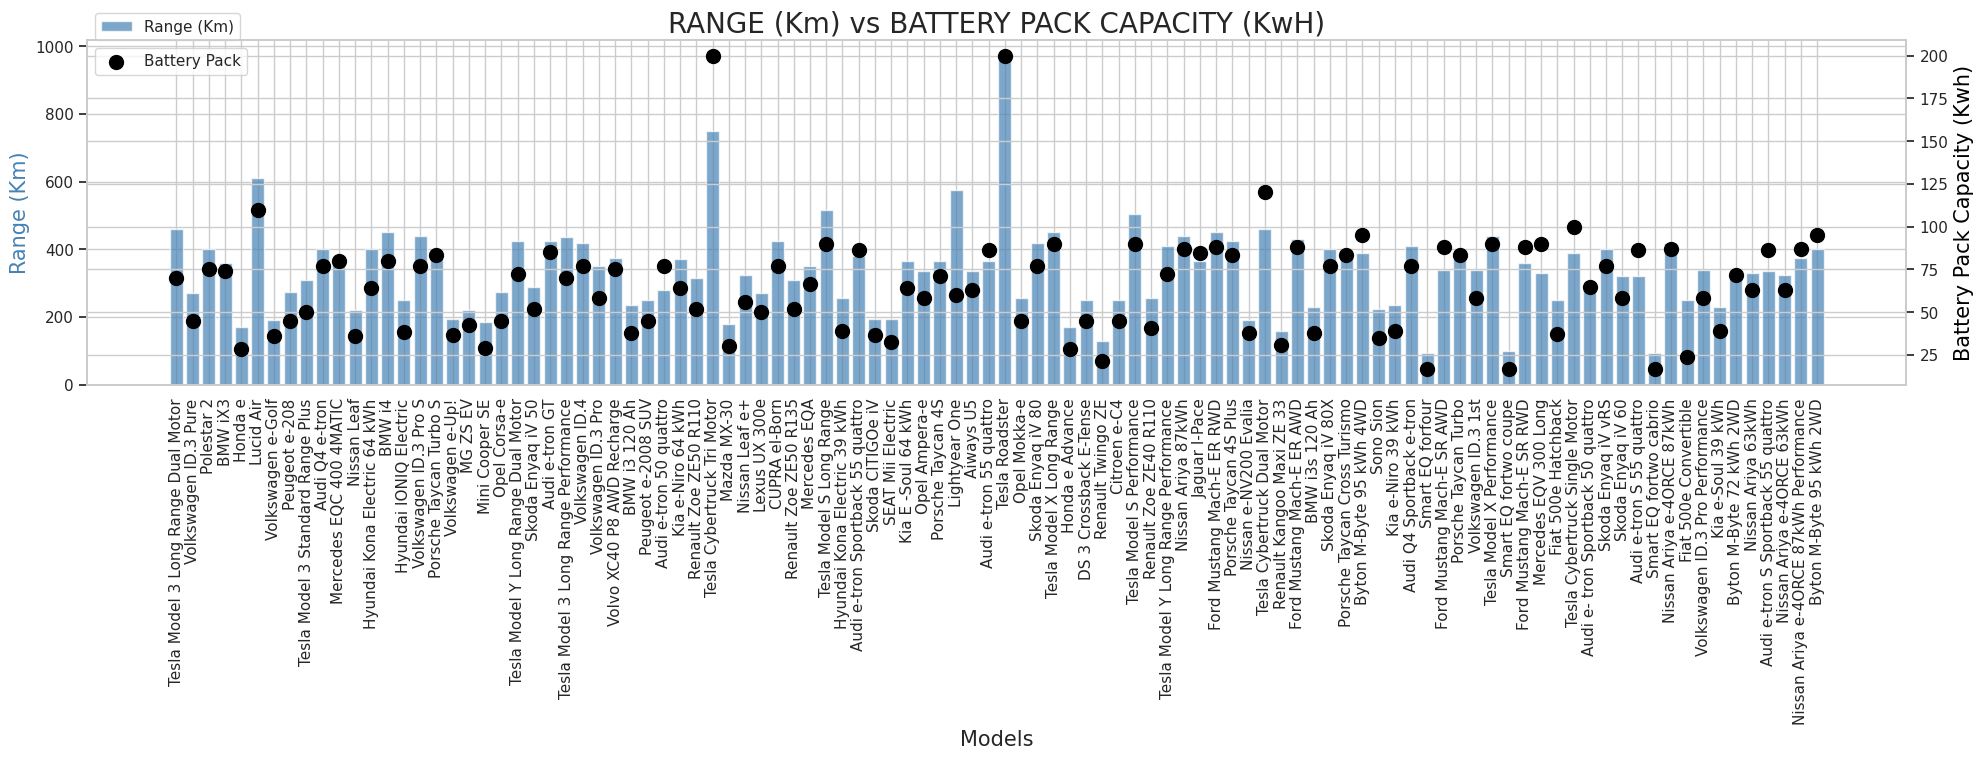

Acceleration 0-100 km/h:


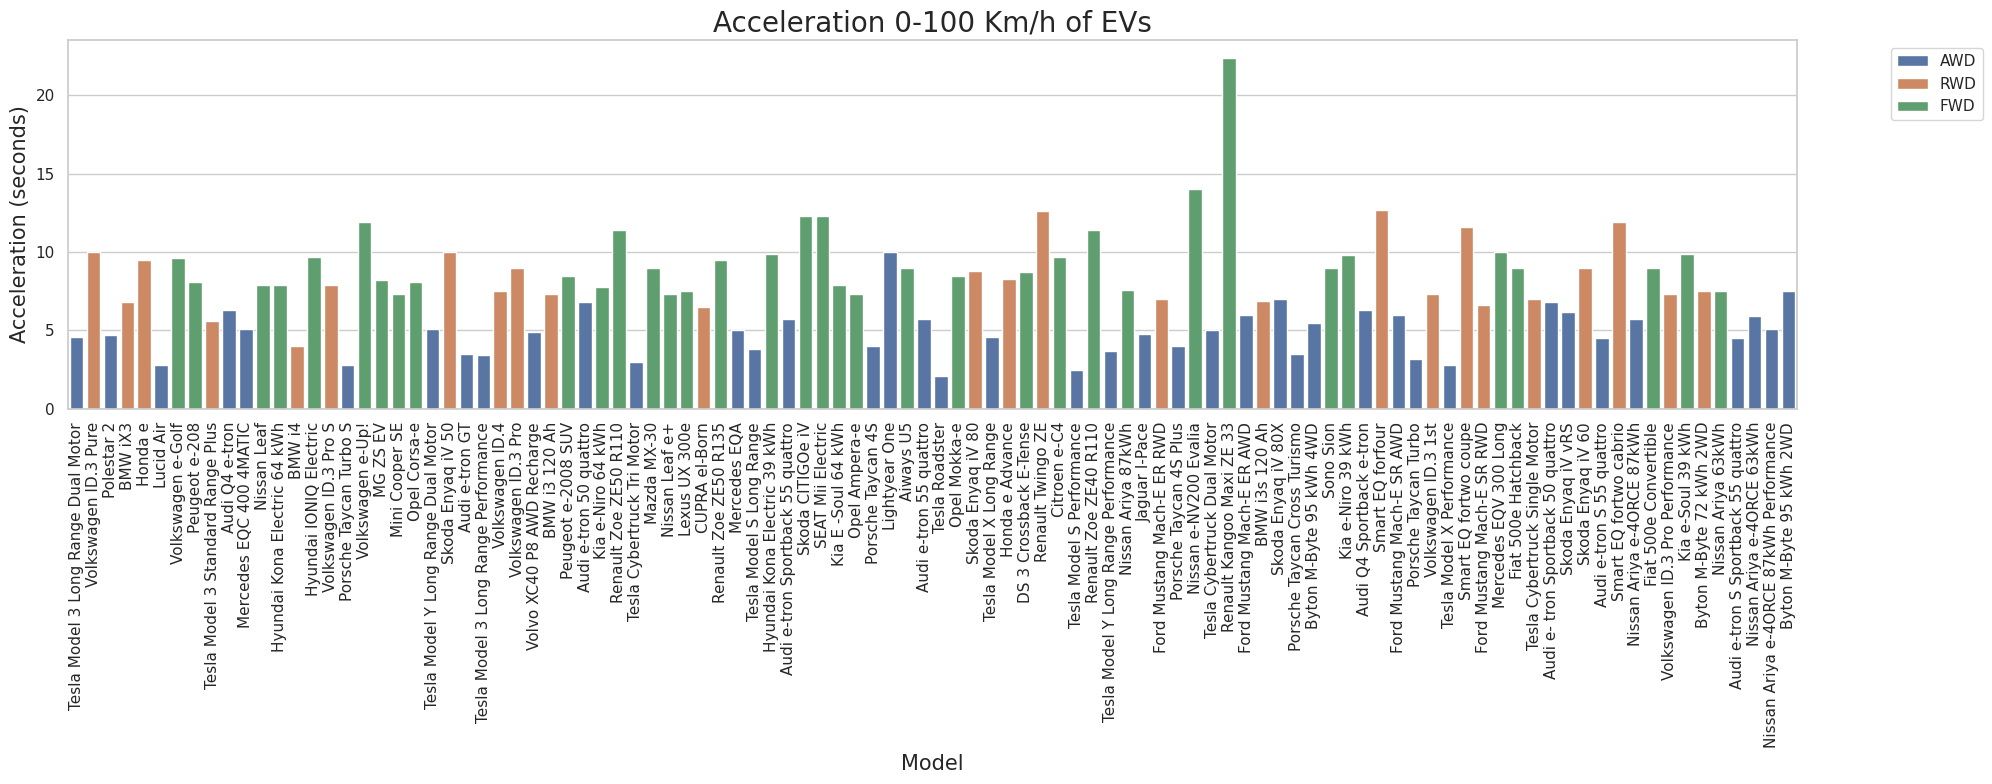

Range vs Price:


/tmp/ipython-input-911778064.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dataframe['FullName'], rotation=90)


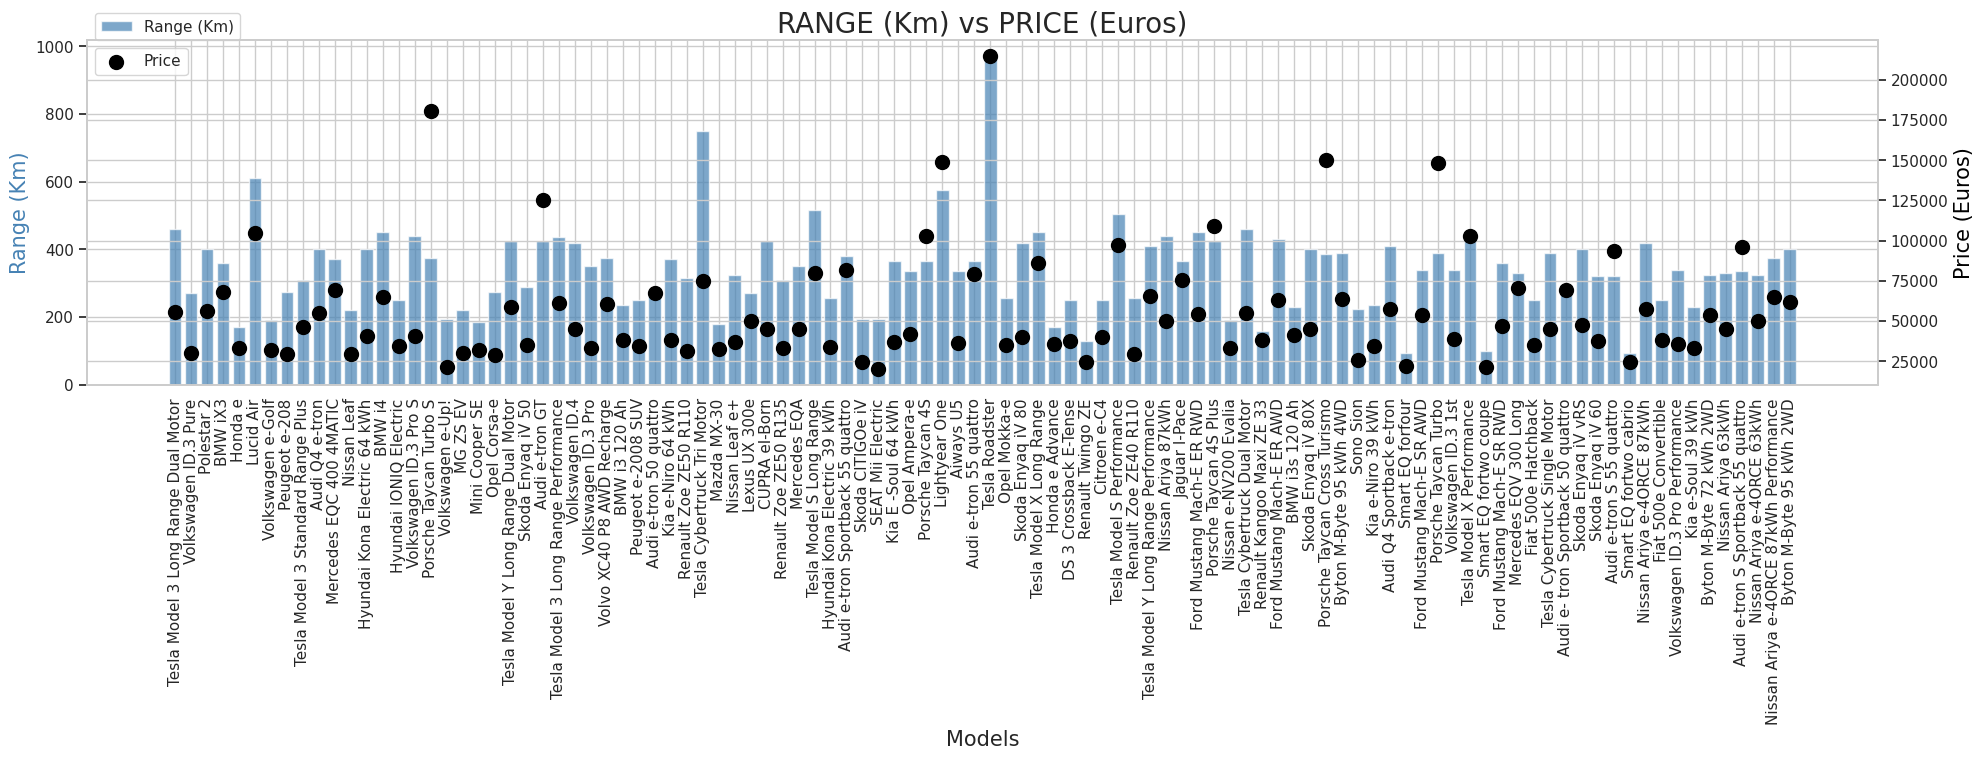

Range vs Efficiency:


/tmp/ipython-input-911778064.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dataframe['FullName'], rotation=90)


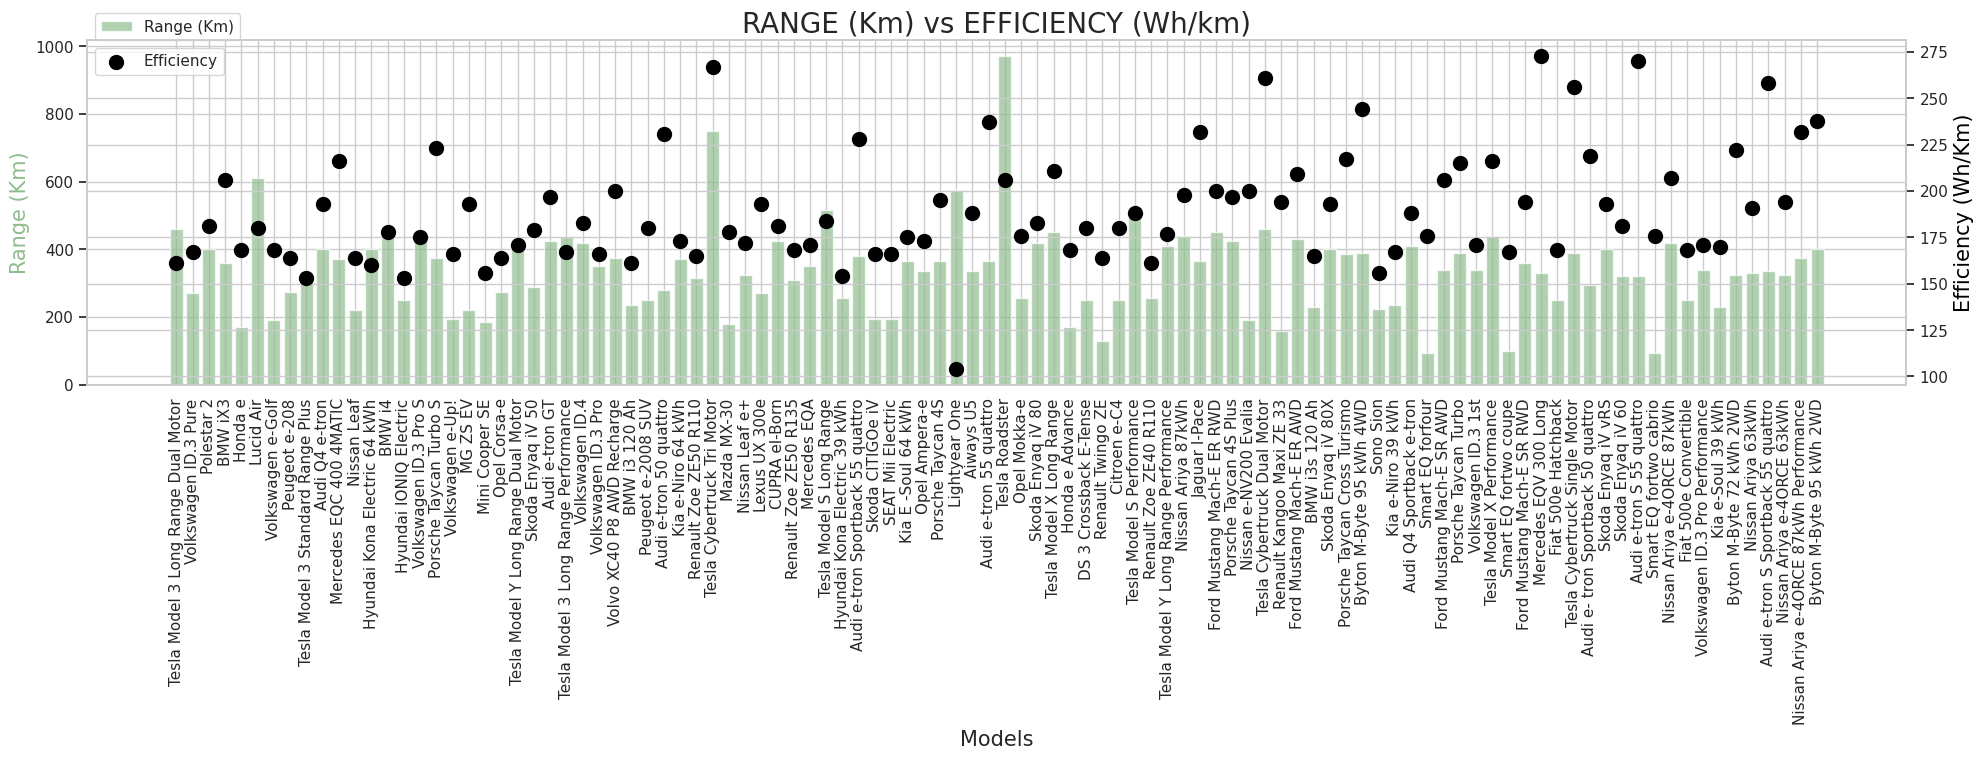

Fast Charging Data:


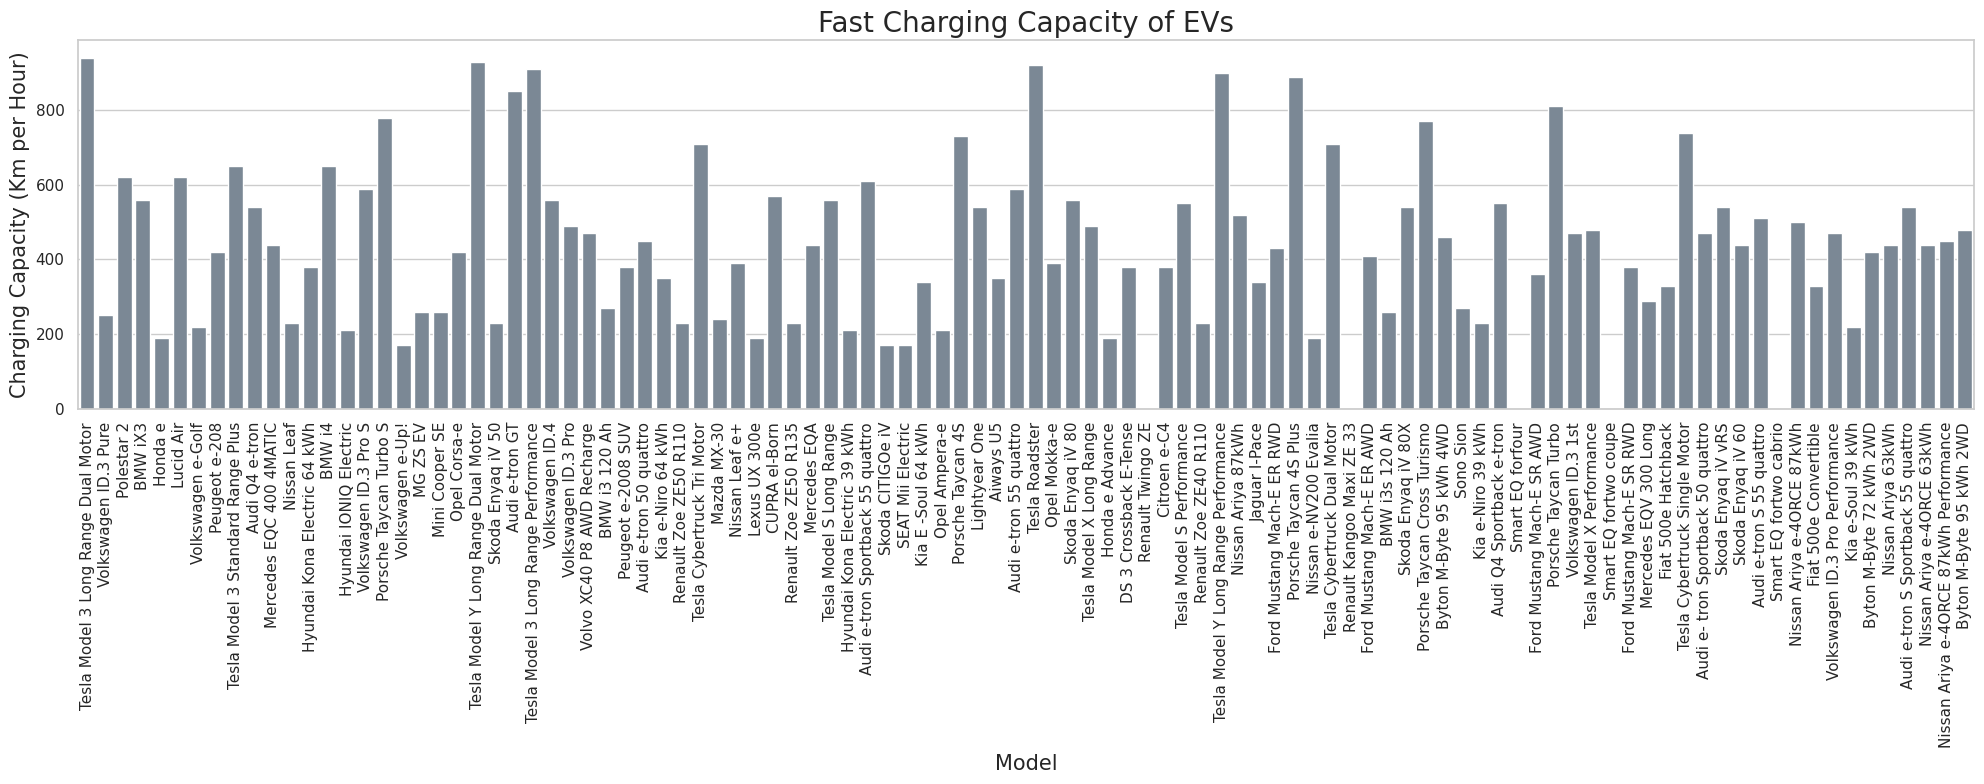

In [10]:

# Function to plot range of vehicles
def range_plot(dataframe, price):
    plt.figure(figsize=(20, 8))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='FullName', y='Range_Km', data=dataframe, hue=dataframe['PowerTrain'])
    plt.title('Range (Km) of EVs', fontsize=20)
    plt.ylabel('Range (Km)', fontsize=15)
    plt.xlabel('Model', fontsize=15)
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Range vs Battery Pack
def range_batterypack(dataframe, text):
    fig = plt.figure(figsize=(20, 8))
    ax1 = plt.subplot()
    ax1.bar(dataframe['FullName'], dataframe['Range_Km'], label='Range (Km)', color='steelblue', alpha=0.7)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
    ax2 = ax1.twinx()
    ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label='Battery Pack', color='black', s=100)
    plt.title('RANGE (Km) vs BATTERY PACK CAPACITY (KwH)', fontsize=20)
    ax1.set_xlabel('Models', size=15)
    ax1.set_ylabel('Range (Km)', color='steelblue', size=15)
    ax2.set_ylabel('Battery Pack Capacity (Kwh)', color='black', size=15)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax1.set_xticklabels(dataframe['FullName'], rotation=90)
    plt.tight_layout()
    plt.show()

# Acceleration (0 - 100Km/Hr)
def acceleration_plot(dataframe, text):
    plt.figure(figsize=(20, 8))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='FullName', y='AccelSec', data=dataframe, hue=dataframe['PowerTrain'])
    plt.title('Acceleration 0-100 Km/h of EVs', fontsize=20)
    plt.ylabel('Acceleration (seconds)', fontsize=15)
    plt.xlabel('Model', fontsize=15)
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Range vs Price
def range_price(dataframe, text):
    fig = plt.figure(figsize=(20, 8))
    ax1 = plt.subplot()
    ax1.bar(dataframe['FullName'], dataframe['Range_Km'], label='Range (Km)', color='steelblue', alpha=0.7)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
    ax2 = ax1.twinx()
    ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label='Price', color='black', s=100)
    plt.title('RANGE (Km) vs PRICE (Euros)', fontsize=20)
    ax1.set_xlabel('Models', size=15)
    ax1.set_ylabel('Range (Km)', color='steelblue', size=15)
    ax2.set_ylabel('Price (Euros)', color='black', size=15)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax1.set_xticklabels(dataframe['FullName'], rotation=90)
    plt.tight_layout()
    plt.show()

# Range vs Efficiency
def range_efficiency(dataframe, text):
    fig = plt.figure(figsize=(20, 8))
    ax1 = plt.subplot()
    ax1.bar(dataframe['FullName'], dataframe['Range_Km'], label='Range (Km)', color='darkseagreen', alpha=0.7)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
    ax2 = ax1.twinx()
    ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label='Efficiency', color='black', s=100)
    plt.title('RANGE (Km) vs EFFICIENCY (Wh/km)', fontsize=20)
    ax1.set_xlabel('Models', size=15)
    ax1.set_ylabel('Range (Km)', color='darkseagreen', size=15)
    ax2.set_ylabel('Efficiency (Wh/Km)', color='black', size=15)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax1.set_xticklabels(dataframe['FullName'], rotation=90)
    plt.tight_layout()
    plt.show()

# Fast charging data
def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 8))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='FullName', y='FastCharge_KmH', data=dataframe, color='lightslategrey')
    plt.title('Fast Charging Capacity of EVs', fontsize=20)
    plt.ylabel('Charging Capacity (Km per Hour)', fontsize=15)
    plt.xlabel('Model', fontsize=15)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Execute all bar graph functions
print("Range of Vehicles:")
range_plot(df, "")

print("Range vs Battery Pack:")
range_batterypack(df, "")

print("Acceleration 0-100 km/h:")
acceleration_plot(df, "")

print("Range vs Price:")
range_price(df, "")

print("Range vs Efficiency:")
range_efficiency(df, "")

print("Fast Charging Data:")
fastcharge(df, "")



7. ADDITIONAL ANALYSIS
------------------------------
Top Speed Analysis:


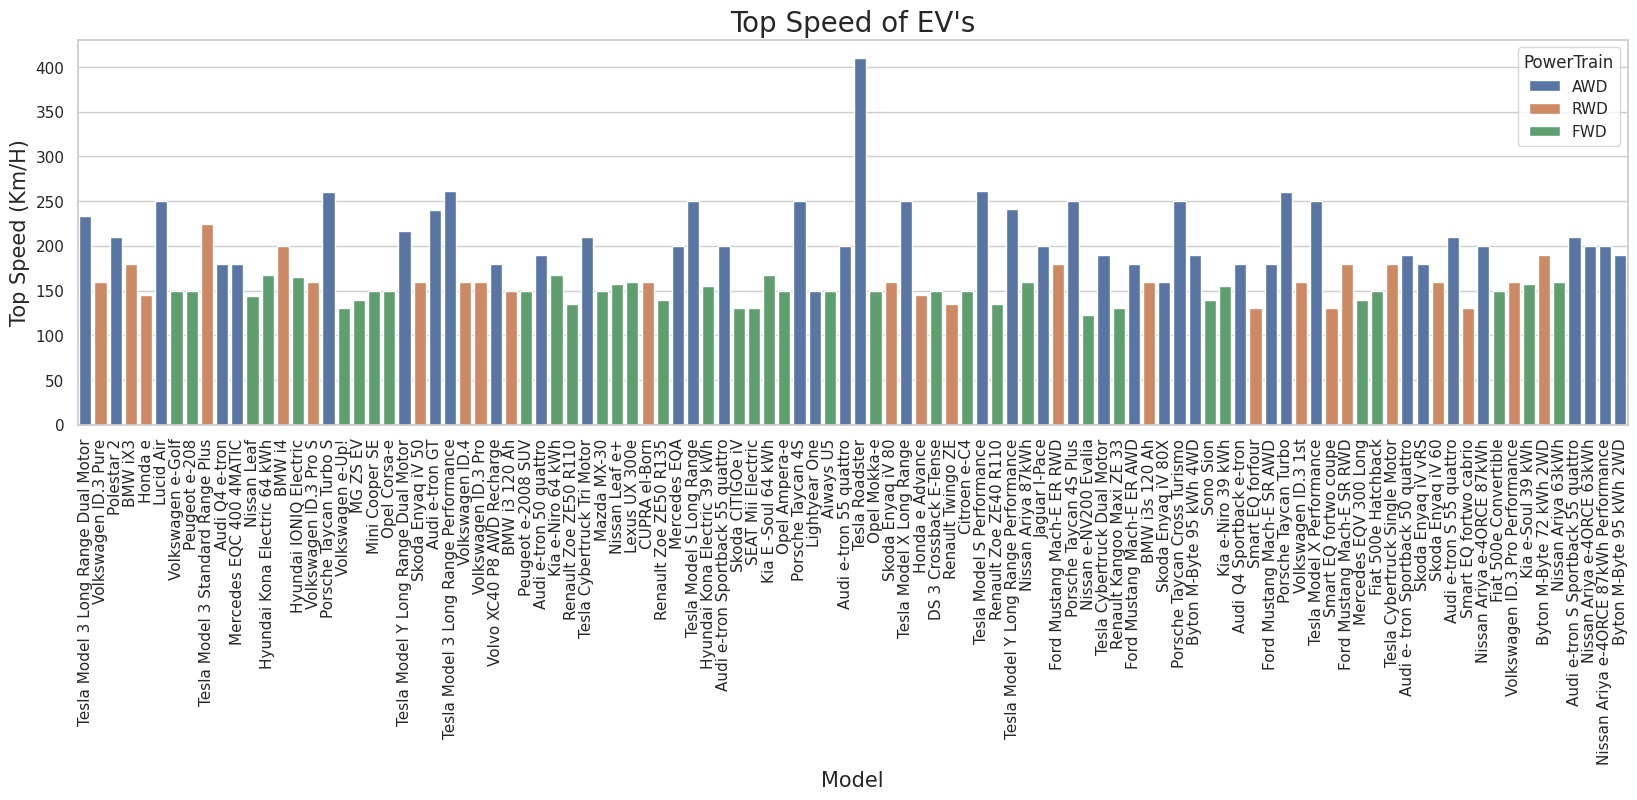

Price by Segment:


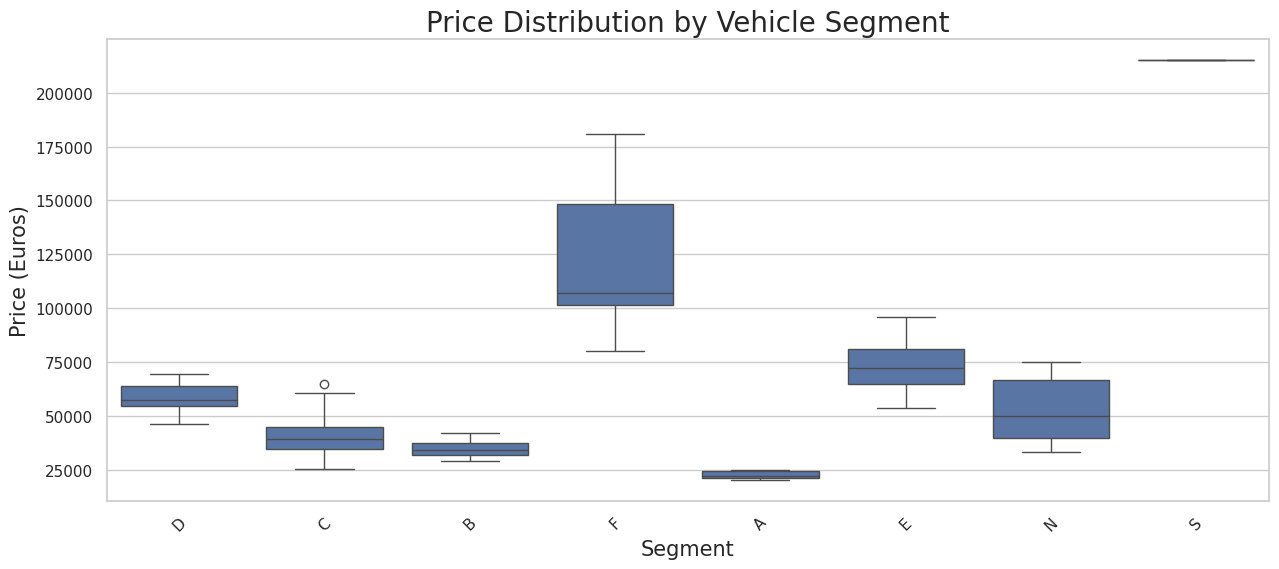

In [11]:
print("\n7. ADDITIONAL ANALYSIS")
print("-" * 30)

# Top Speed Analysis
def topspeed(dataframe, text):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='FullName', y='TopSpeed_KmH', data=dataframe, hue=dataframe['PowerTrain'])
    plt.title('''Top Speed of EV's''', fontsize=20)
    plt.ylabel('Top Speed (Km/H)', fontsize=15)
    plt.xlabel('Model', fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

# Price by Segment
def price_segment(dataframe, text):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=dataframe, x='Segment', y='PriceEuro')
    plt.title('Price Distribution by Vehicle Segment', fontsize=20)
    plt.xlabel('Segment', fontsize=15)
    plt.ylabel('Price (Euros)', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

# Execute additional analysis
print("Top Speed Analysis:")
topspeed(df, "")

print("Price by Segment:")
price_segment(df, "")


In [12]:
print("\n8. KEY INSIGHTS SUMMARY")
print("-" * 30)

print(f"Total number of vehicles: {len(df)}")
print(f"Number of unique brands: {df['Brand'].nunique()}")
print(f"Average price: €{df['PriceEuro'].mean():,.0f}")
print(f"Average range: {df['Range_Km'].mean():.0f} km")
print(f"Most common body style: {df['BodyStyle'].mode().values[0]}")
print(f"Most common powertrain: {df['PowerTrain'].mode().values[0]}")

# Find the vehicle with best range
best_range = df.loc[df['Range_Km'].idxmax()]
print(f"\n🏆 Vehicle with longest range: {best_range['Brand']} {best_range['Model']} - {best_range['Range_Km']} km")

# Find the fastest accelerating vehicle
fastest_accel = df.loc[df['AccelSec'].idxmin()]
print(f"⚡ Fastest accelerating: {fastest_accel['Brand']} {fastest_accel['Model']} - {fastest_accel['AccelSec']} seconds")

# Find the most efficient vehicle
most_efficient = df.loc[df['Efficiency_WhKm'].idxmin()]
print(f"💚 Most efficient: {most_efficient['Brand']} {most_efficient['Model']} - {most_efficient['Efficiency_WhKm']} Wh/Km")

print("\n✅ Electric Vehicle Analysis Complete!")


8. KEY INSIGHTS SUMMARY
------------------------------
Total number of vehicles: 102
Number of unique brands: 33
Average price: €55,998
Average range: 339 km
Most common body style: SUV
Most common powertrain: AWD

🏆 Vehicle with longest range: Tesla Roadster - 970 km
⚡ Fastest accelerating: Tesla Roadster - 2.1 seconds
💚 Most efficient: Lightyear One - 104 Wh/Km

✅ Electric Vehicle Analysis Complete!


## Machine Learning model


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the data for ML
print("\n📊 Preparing Data for ML...")
print("-" * 30)

# Create a copy for ML
ml_df = df.copy()

# Select features for prediction
# We'll predict PriceEuro based on other features
feature_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh',
                   'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain',
                   'BodyStyle', 'Segment', 'Seats']

target_column = 'PriceEuro'

# Remove any rows with missing values in our selected columns
ml_df_clean = ml_df[feature_columns + [target_column]].dropna()

print(f"Dataset size after cleaning: {ml_df_clean.shape}")
print(f"Features used: {len(feature_columns)}")

# Encode categorical variables
print("\n🔄 Encoding categorical variables...")
label_encoders = {}
categorical_columns = ['PowerTrain', 'BodyStyle', 'Segment']

for col in categorical_columns:
    le = LabelEncoder()
    ml_df_clean[col] = le.fit_transform(ml_df_clean[col])
    label_encoders[col] = le
    print(f"  - {col}: {len(le.classes_)} categories")

# Prepare features (X) and target (y)
X = ml_df_clean[feature_columns]
y = ml_df_clean[target_column]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✅ Data split complete:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Testing set: {X_test.shape[0]} samples")

# Feature Scaling (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


📊 Preparing Data for ML...
------------------------------
Dataset size after cleaning: (102, 11)
Features used: 10

🔄 Encoding categorical variables...
  - PowerTrain: 3 categories
  - BodyStyle: 9 categories
  - Segment: 8 categories

✅ Data split complete:
  Training set: 81 samples
  Testing set: 21 samples


### training

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

results = {}

for name, model in models.items():
    print(f"\n🤖 Training {name}...")

    # Use scaled data for Linear Regression, original for tree-based models
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred
    }

    print(f"  ✓ MAE: €{mae:,.0f}")
    print(f"  ✓ RMSE: €{rmse:,.0f}")
    print(f"  ✓ R² Score: {r2:.3f}")


🤖 Training Linear Regression...
  ✓ MAE: €11,281
  ✓ RMSE: €15,814
  ✓ R² Score: 0.686

🤖 Training Random Forest...
  ✓ MAE: €7,282
  ✓ RMSE: €11,746
  ✓ R² Score: 0.827

🤖 Training Gradient Boosting...
  ✓ MAE: €6,406
  ✓ RMSE: €10,089
  ✓ R² Score: 0.872



📊 Performance Summary:
            Model      MAE (€)     RMSE (€)  R² Score
Linear Regression 11281.342634 15814.314905  0.686321
    Random Forest  7281.661953 11745.848450  0.826957
Gradient Boosting  6405.957623 10088.705554  0.872340


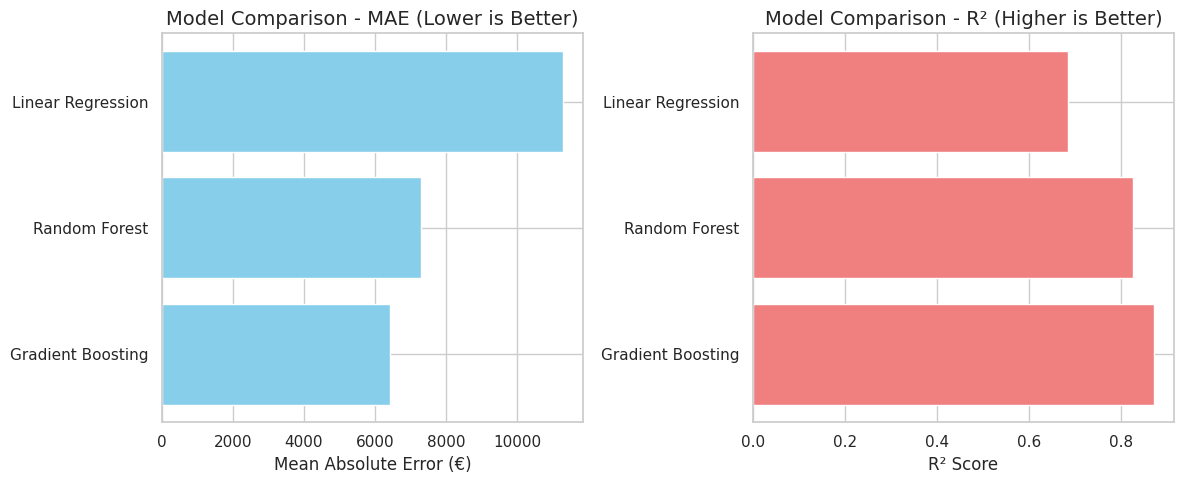

In [15]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE (€)': [results[m]['mae'] for m in results.keys()],
    'RMSE (€)': [results[m]['rmse'] for m in results.keys()],
    'R² Score': [results[m]['r2'] for m in results.keys()]
})

print("\n📊 Performance Summary:")
print(comparison_df.to_string(index=False))

# Visualize model comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(comparison_df['Model'], comparison_df['MAE (€)'], color='skyblue')
plt.xlabel('Mean Absolute Error (€)', fontsize=12)
plt.title('Model Comparison - MAE (Lower is Better)', fontsize=14)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(comparison_df['Model'], comparison_df['R² Score'], color='lightcoral')
plt.xlabel('R² Score', fontsize=12)
plt.title('Model Comparison - R² (Higher is Better)', fontsize=14)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


🏆 Best Model: Gradient Boosting
  R² Score: 0.872
  MAE: €6,406

📈 Feature Importance:
         Feature  Importance
        AccelSec    0.551378
           Seats    0.154408
 Efficiency_WhKm    0.082177
Battery_Pack Kwh    0.076097
        Range_Km    0.056508
    TopSpeed_KmH    0.036850
         Segment    0.023688
  FastCharge_KmH    0.011047
      PowerTrain    0.005400
       BodyStyle    0.002446


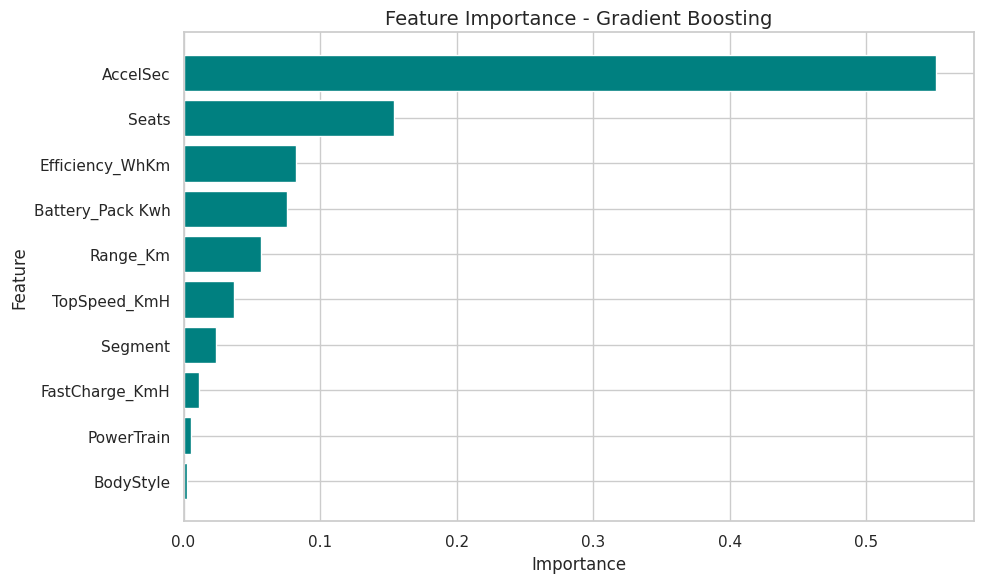

In [16]:
best_model_name = comparison_df.loc[comparison_df['R² Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"  R² Score: {results[best_model_name]['r2']:.3f}")
print(f"  MAE: €{results[best_model_name]['mae']:,.0f}")

# Feature Importance (for tree-based models)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print("\n📈 Feature Importance:")

    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(feature_importance.to_string(index=False))

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

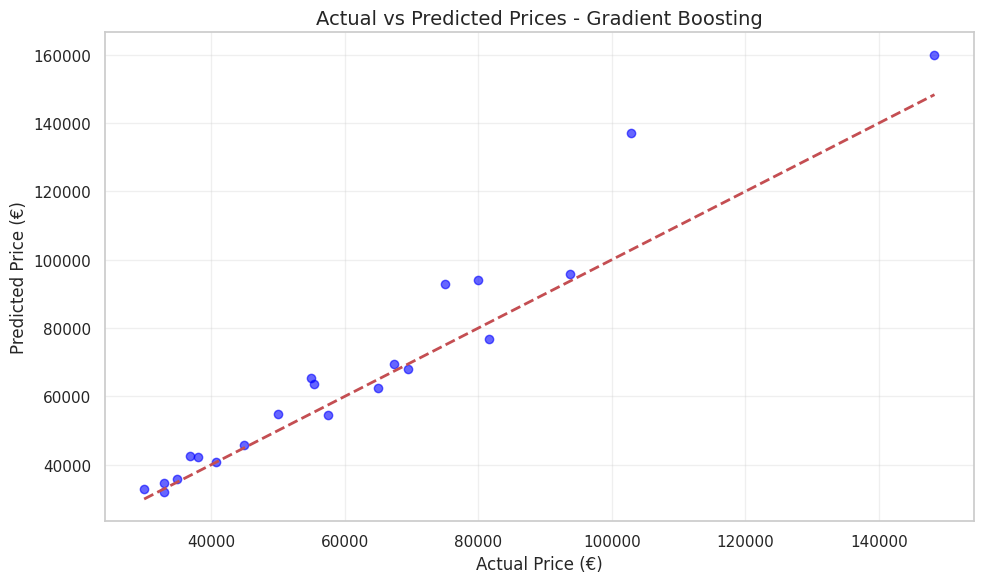

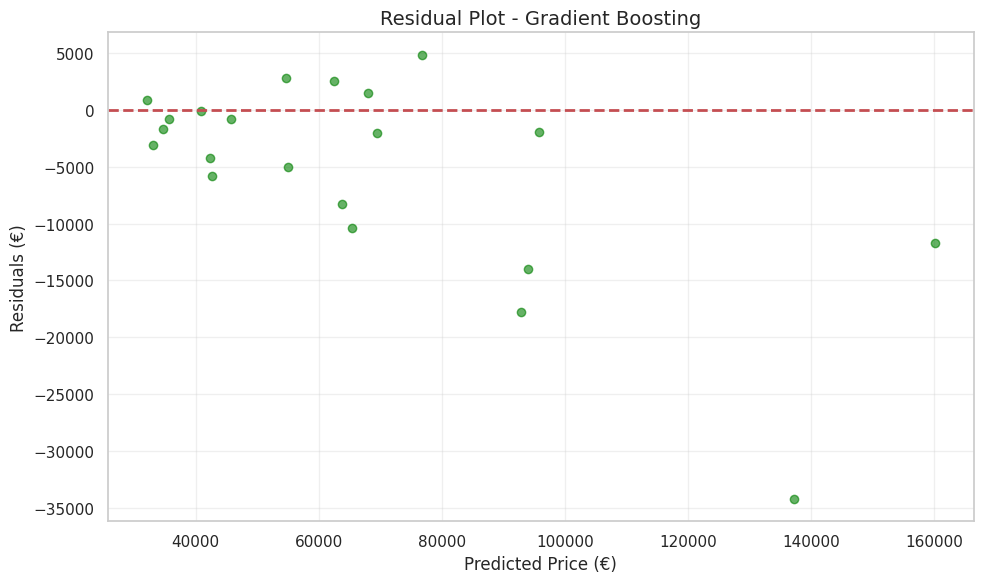

In [17]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, results[best_model_name]['predictions'], alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (€)', fontsize=12)
plt.ylabel('Predicted Price (€)', fontsize=12)
plt.title(f'Actual vs Predicted Prices - {best_model_name}', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - results[best_model_name]['predictions']
plt.figure(figsize=(10, 6))
plt.scatter(results[best_model_name]['predictions'], residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price (€)', fontsize=12)
plt.ylabel('Residuals (€)', fontsize=12)
plt.title(f'Residual Plot - {best_model_name}', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Show some example predictions
example_indices = np.random.choice(X_test.index, 5, replace=False)
examples = ml_df_clean.loc[example_indices]

print("\n🔮 Sample Predictions:\n")
for idx in example_indices:
    actual = y_test.loc[idx]
    if best_model_name == 'Linear Regression':
        pred = best_model.predict(scaler.transform(X_test.loc[[idx]]))[0]
    else:
        pred = best_model.predict(X_test.loc[[idx]])[0]

    print(f"Vehicle #{idx}")
    print(f"  Actual Price: €{actual:,.0f}")
    print(f"  Predicted Price: €{pred:,.0f}")
    print(f"  Difference: €{abs(actual - pred):,.0f}")
    print()



🔮 Sample Predictions:

Vehicle #18
  Actual Price: €30,000
  Predicted Price: €33,058
  Difference: €3,058

Vehicle #33
  Actual Price: €75,000
  Predicted Price: €92,780
  Difference: €17,780

Vehicle #12
  Actual Price: €40,795
  Predicted Price: €40,889
  Difference: €94

Vehicle #0
  Actual Price: €55,480
  Predicted Price: €63,777
  Difference: €8,297

Vehicle #47
  Actual Price: €102,945
  Predicted Price: €137,152
  Difference: €34,207

